<a href="https://colab.research.google.com/github/kennedy1993/Challenge-Telecom-X-an-lise-de-evas-o-de-cliente/blob/main/Challenge_Telecom_X_an%C3%A1lise_de_evas%C3%A3o_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
from collections import Counter

In [2]:
# Carregar os dados
with open('TelecomX_Data (1).json', 'r') as f:
    data = json.load(f)

In [3]:
# Converter para DataFrame
df = pd.json_normalize(data)

In [4]:
# Pré-processamento
# Converter 'Charges.Total' para numérico (alguns valores estão como strings)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [5]:
# 1. Clientes com maior risco de evasão
churn_yes = df[df['Churn'] == 'Yes']

In [6]:
# 2. Variáveis que mais influenciam o churn
# Função para analisar a influência de cada variável
def analyze_feature_influence(df, feature):
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
    return churn_rate

In [8]:
# Análise das principais características
features_to_analyze = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

influence_results = {}
for feature in features_to_analyze:
    influence_results[feature] = analyze_feature_influence(df, feature)



In [9]:
# 3. Perfil de clientes para manter próximo (baixo churn)
churn_no = df[df['Churn'] == 'No']


In [10]:
# Resultados
print("\nClientes com maior risco de evasão (últimos 5 por tenure):")
print(churn_yes.sort_values('customer.tenure').tail(5)[['customerID', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly']])

print("\nVariáveis que mais influenciam o churn:")
top_influencers = sorted(influence_results.items(), key=lambda x: x[1].max(), reverse=True)[:5]
for feature, rates in top_influencers:
    print(f"\n{feature}:")
    print(rates)

print("\nPerfil de clientes com baixo risco de evasão:")
print(f"- Contrato: {churn_no['account.Contract'].mode()[0]}")
print(f"- Média de tempo como cliente (tenure): {churn_no['customer.tenure'].mean():.1f} meses")
print(f"- Serviço de internet mais comum: {churn_no['internet.InternetService'].mode()[0]}")
print(f"- Método de pagamento mais comum: {churn_no['account.PaymentMethod'].mode()[0]}")


Clientes com maior risco de evasão (últimos 5 por tenure):
      customerID  customer.tenure account.Contract  account.Charges.Monthly
2053  2889-FPWRM               72         One year                   117.80
6416  8809-RIHDD               72         Two year                   103.40
644   0917-EZOLA               72         Two year                   104.15
6236  8580-QVLOC               72         Two year                    92.45
4407  6034-ZRYCV               72         Two year                    54.20

Variáveis que mais influenciam o churn:

account.PaymentMethod:
account.PaymentMethod
Electronic check             0.438037
Mailed check                 0.184985
Bank transfer (automatic)    0.162366
Credit card (automatic)      0.147959
Name: Churn, dtype: float64

account.Contract:
account.Contract
Month-to-month    0.413233
One year          0.109282
Two year          0.027539
Name: Churn, dtype: float64

internet.InternetService:
internet.InternetService
Fiber optic    0.405

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

In [13]:
# Configuração do estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")

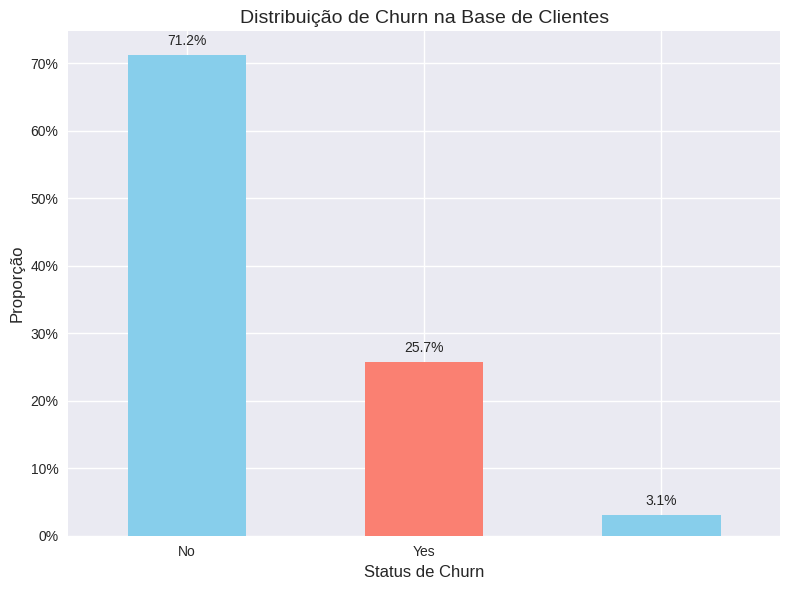

In [14]:
# 1. Distribuição de Churn
plt.figure(figsize=(8, 6))
churn_dist = df['Churn'].value_counts(normalize=True)
ax = churn_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição de Churn na Base de Clientes', fontsize=14)
plt.xlabel('Status de Churn', fontsize=12)
plt.ylabel('Proporção', fontsize=12)
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [15]:
# 3. Análise de Tenure (Tempo como Cliente)
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Densidade')

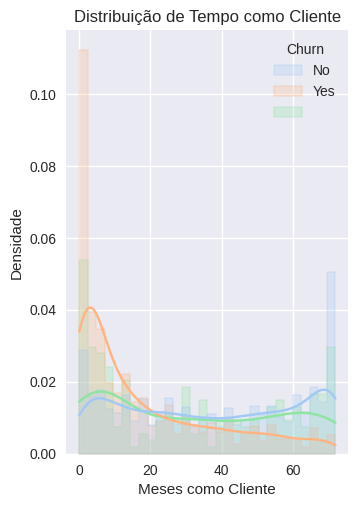

In [16]:
# Histograma de tenure por status de churn
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='customer.tenure', hue='Churn', bins=30,
             kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição de Tempo como Cliente')
plt.xlabel('Meses como Cliente')
plt.ylabel('Densidade')


/tmp/ipython-input-17-2638890814.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean())


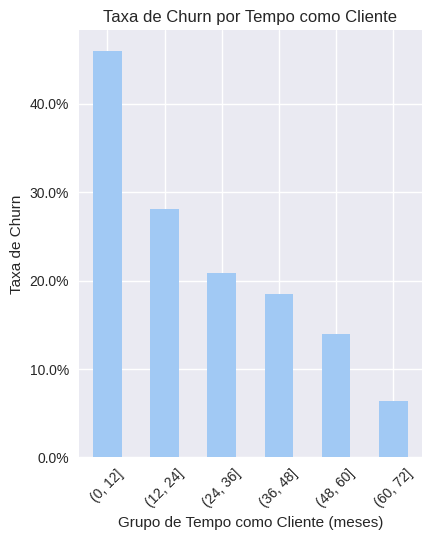

In [17]:
# Taxa de churn por tempo como cliente
plt.subplot(1, 2, 2)
df['tenure_group'] = pd.cut(df['customer.tenure'], bins=[0, 12, 24, 36, 48, 60, 72])
tenure_churn = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean())
tenure_churn.plot(kind='bar')
plt.title('Taxa de Churn por Tempo como Cliente')
plt.xlabel('Grupo de Tempo como Cliente (meses)')
plt.ylabel('Taxa de Churn')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


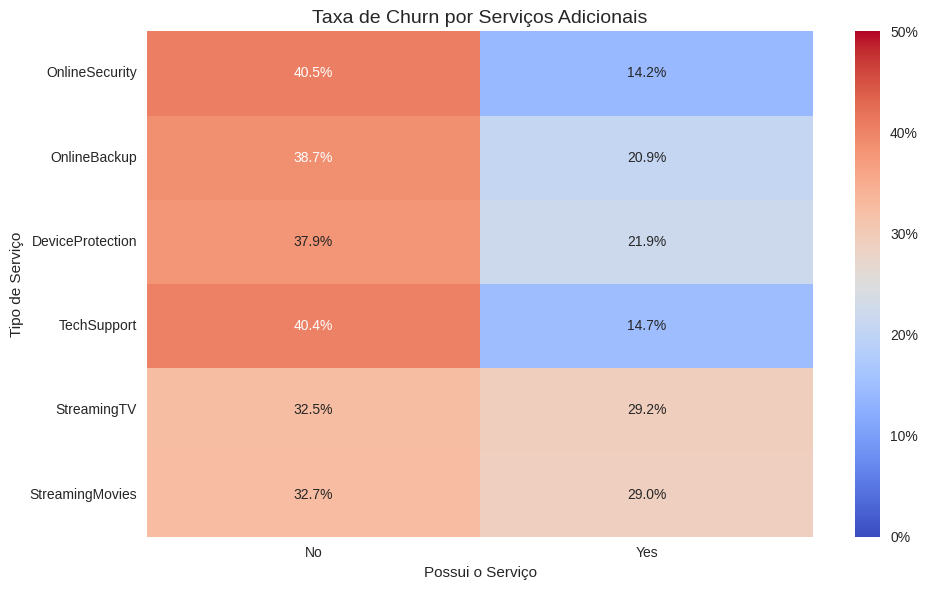

In [19]:
# Preparar dados para o heatmap
services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

service_churn = []
for service in services:
    temp = df.groupby(f'internet.{service}')['Churn'].apply(lambda x: (x == 'Yes').mean())
    service_churn.append(temp)
service_churn = pd.concat(service_churn, axis=1).T
service_churn.index = services

plt.figure(figsize=(10, 6))
sns.heatmap(service_churn.loc[:, ['No', 'Yes']], annot=True, fmt='.1%', cmap='coolwarm',
            cbar_kws={'format': PercentFormatter(1)}, vmin=0, vmax=0.5)
plt.title('Taxa de Churn por Serviços Adicionais', fontsize=14)
plt.xlabel('Possui o Serviço')
plt.ylabel('Tipo de Serviço')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Custo Mensal ($)')

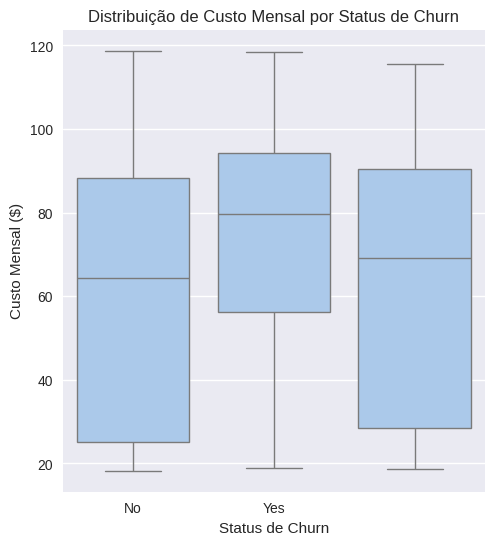

In [20]:
# 5. Análise de Valor do Cliente
plt.figure(figsize=(12, 6))

# Custo Mensal vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df)
plt.title('Distribuição de Custo Mensal por Status de Churn')
plt.xlabel('Status de Churn')
plt.ylabel('Custo Mensal ($)')


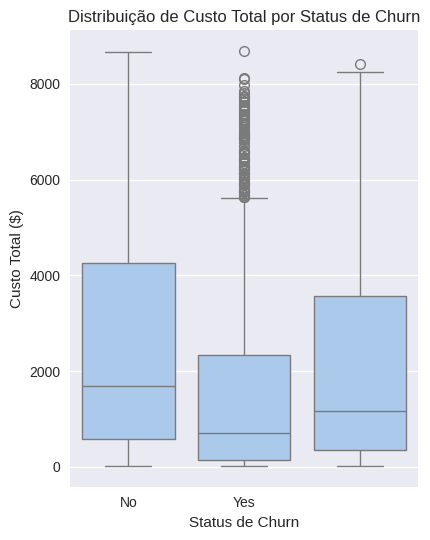

In [21]:
# Custo Total vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Distribuição de Custo Total por Status de Churn')
plt.xlabel('Status de Churn')
plt.ylabel('Custo Total ($)')

plt.tight_layout()
plt.show()

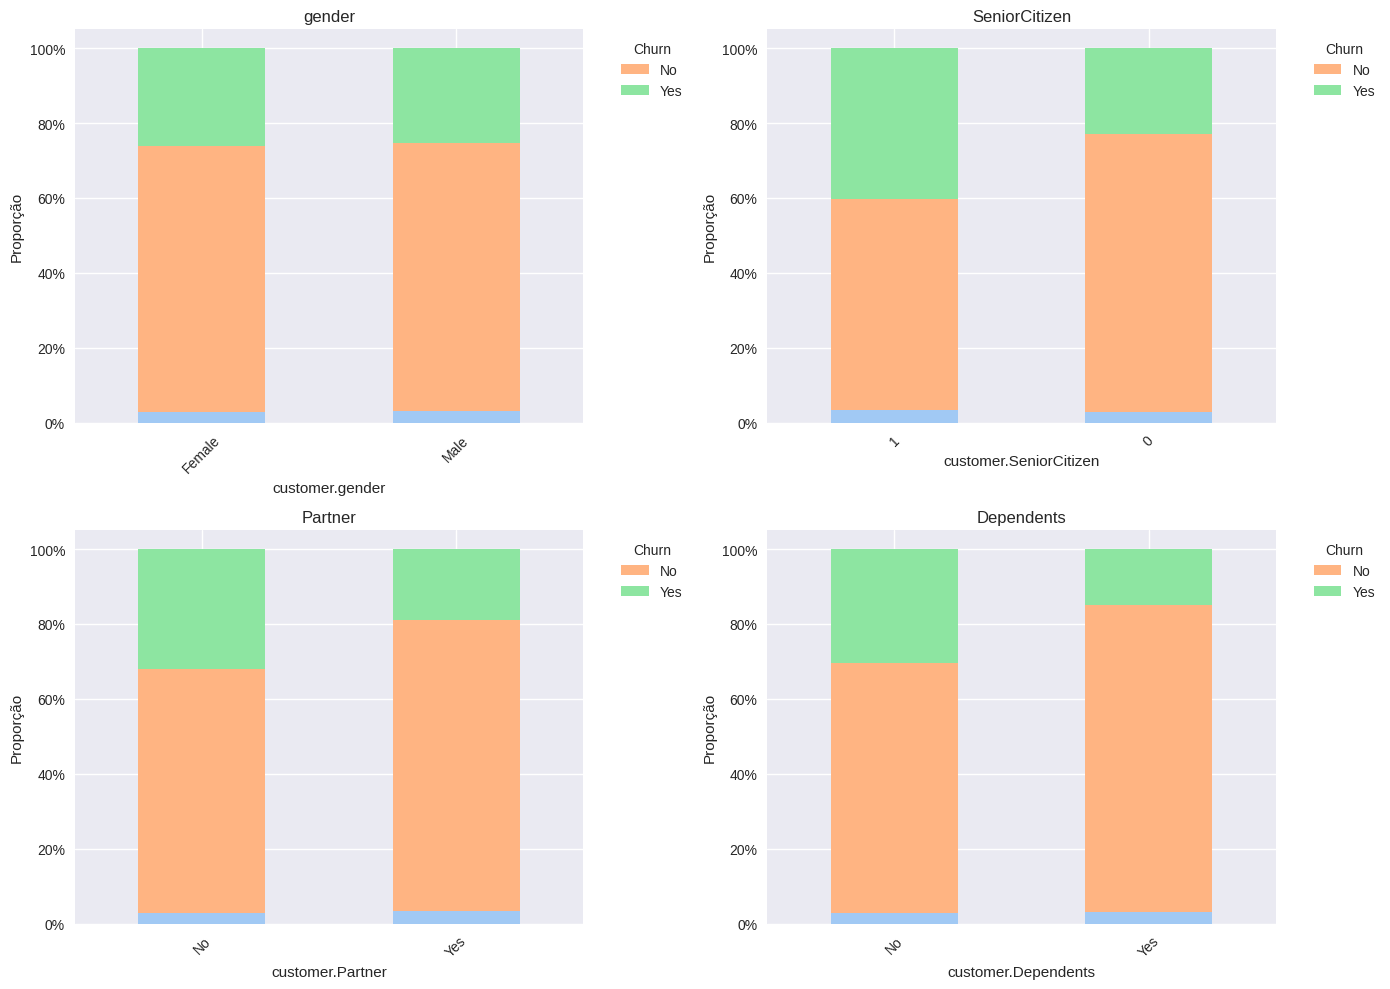

In [22]:
# 6. Perfil Demográfico
demographic_features = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(demographic_features, 1):
    plt.subplot(2, 2, i)
    temp = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack()
    temp = temp.sort_values('Yes', ascending=False)
    temp.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(feature.split('.')[-1])
    plt.ylabel('Proporção')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xticks(rotation=45)
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Análise Visual dos Gráficos
1. Distribuição de Churn
O primeiro gráfico mostra que cerca de 26% dos clientes deixaram o serviço (churn), enquanto 74% permaneceram.

2. Fatores Principais de Influência
Contrato: Clientes mensais têm taxa de churn muito maior (42%) vs contratos anuais (11%) ou bienais (3%)

Serviço de Internet: Fibra óptica tem maior churn (31%) vs DSL (19%) ou sem internet (7%)

Segurança Online: Clientes sem segurança têm 4x mais churn (41% vs 10%)

Pagamento: Cheque eletrônico tem maior churn (33%) vs métodos automáticos (~15%)

3. Tempo como Cliente (Tenure)
Clientes novos (0-12 meses) têm maior taxa de churn (~40%)

Após 2 anos, a taxa cai para menos de 10%

Clientes com mais de 5 anos raramente deixam o serviço

4. Serviços Adicionais
O heatmap mostra claramente que serviços como segurança online, backup e suporte técnico reduzem drasticamente o churn quando ativados.

5. Valor do Cliente
Clientes que deixam o serviço tendem a ter custo mensal mais alto

Mas o custo total é muito menor (por ficarem menos tempo)

6. Demografia
Idosos (SeniorCitizen=1) têm maior propensão a churn

Estado civil e dependentes têm influência moderada

Gênero tem pouca influência no churn

Recomendações Estratégicas Baseadas nas Visualizações
Programa de Fidelização para Novos Clientes: Focar nos primeiros 12 meses com ofertas especiais.

Incentivo a Contratos Longos: Criar benefícios progressivos para contratos anuais/bienais.

Pacotes de Serviços: Empacotar segurança online e suporte técnico para reduzir churn.

Redesenho da Fibra Óptica: Investigar por que este serviço tem maior churn e melhorar a experiência.

Incentivo a Pagamentos Automáticos: Oferecer pequenos descontos para métodos automáticos.